#### Data Exploration and Processing 

In [1]:
# Importing standards python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
%matplotlib inline

In [2]:
data = pd.read_csv("IMDB_Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

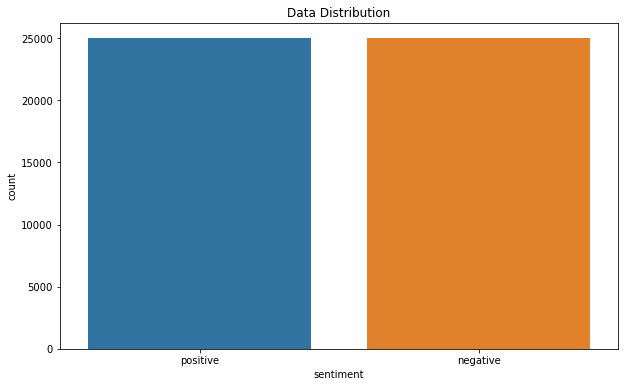

In [4]:
plt.figure(figsize = (10,6))
plt.title("Data Distribution")
sns.countplot(x = "sentiment", data = data)

plt.show()

In [5]:
data.iloc[1,0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
def clean_review(text):
    clean_text = re.sub('<br\s?\/>|<br>', '', text)
    
    clean_text = re.sub('[^ a-zA-Z\'.]', ' ', clean_text)
#     clean_text = clean_text.lower()
    return clean_text

In [7]:
data['review'] = data['review'].apply(lambda x : clean_review(x))

In [8]:
data.iloc[1,0]

"A wonderful little production. The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece. The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams' diary entries  not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell's murals decorating every surface  are terribly well done."

In [9]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_lg")
nlp.pipe_names

['tagger', 'parser', 'ner']

In [10]:
text = "A wonderful little production. The filming technique is very unassuming very old time BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece"

In [11]:
doc = nlp(text)

In [12]:
# Removing stopwords and punctuations
cleaned_doc = [token for token in doc if not token.is_stop and not token.is_punct]
# SpaCy has a lot of lexical attributes available such as is_alpha, is_ascii, is_digit, is_upper, is_lower, is_space,
# like_url, like_num, like_email and so on.
for token in cleaned_doc:
    print("Text: ",token.text,"  Lemma: ",token.lemma_,"  POS Tagging:", token.pos_)

Text:  wonderful   Lemma:  wonderful   POS Tagging: ADJ
Text:  little   Lemma:  little   POS Tagging: ADJ
Text:  production   Lemma:  production   POS Tagging: NOUN
Text:  filming   Lemma:  filming   POS Tagging: NOUN
Text:  technique   Lemma:  technique   POS Tagging: NOUN
Text:  unassuming   Lemma:  unassuming   POS Tagging: ADJ
Text:  old   Lemma:  old   POS Tagging: ADJ
Text:  time   Lemma:  time   POS Tagging: NOUN
Text:  BBC   Lemma:  BBC   POS Tagging: PROPN
Text:  fashion   Lemma:  fashion   POS Tagging: NOUN
Text:  gives   Lemma:  give   POS Tagging: VERB
Text:  comforting   Lemma:  comforting   POS Tagging: ADJ
Text:  discomforting   Lemma:  discomforting   POS Tagging: ADJ
Text:  sense   Lemma:  sense   POS Tagging: NOUN
Text:  realism   Lemma:  realism   POS Tagging: NOUN
Text:  entire   Lemma:  entire   POS Tagging: ADJ
Text:  piece   Lemma:  piece   POS Tagging: NOUN


#### POS Tagging

In [13]:
displacy.render(doc, style='dep', jupyter=True)

#### Named Entity Recognition

In [14]:
displacy.render(nlp(data.iloc[1,0]), style='ent', jupyter=True)

#### Words Embedding

In [15]:
# Words embedding using SpaCy
for token in doc:
    print("Token: ",token.text, "  has vector ? ", token.has_vector, "  vector norm: ",token.vector_norm)

Token:  A   has vector ?  True   vector norm:  5.306696
Token:  wonderful   has vector ?  True   vector norm:  5.980743
Token:  little   has vector ?  True   vector norm:  5.562682
Token:  production   has vector ?  True   vector norm:  6.745772
Token:  .   has vector ?  True   vector norm:  4.9316354
Token:  The   has vector ?  True   vector norm:  4.70935
Token:  filming   has vector ?  True   vector norm:  6.1120787
Token:  technique   has vector ?  True   vector norm:  6.6666865
Token:  is   has vector ?  True   vector norm:  4.890306
Token:  very   has vector ?  True   vector norm:  5.416968
Token:  unassuming   has vector ?  True   vector norm:  6.148713
Token:  very   has vector ?  True   vector norm:  5.416968
Token:  old   has vector ?  True   vector norm:  5.89691
Token:  time   has vector ?  True   vector norm:  5.1279845
Token:  BBC   has vector ?  True   vector norm:  6.6346407
Token:  fashion   has vector ?  True   vector norm:  6.719757
Token:  and   has vector ?  True  

In [16]:
def cosine_similarity(u, v):
    return np.dot(u,v) / (np.sqrt(np.sum(u * u)) * np.sqrt(np.sum(v * v)))

In [17]:
nlp('play').vector_norm 

6.475280273721126

In [18]:
nlp('playing').vector_norm

6.479074877330341

#### Word to Vect

In [19]:
tk1 = nlp("good").vector
tk2 = nlp("bad").vector
tk3 = nlp("terrible").vector
print(tk1.shape)
print(f"similarity between good and terrible: {cosine_similarity(tk1, tk3)}")
print(f"similarity between bad and terrible: {cosine_similarity(tk2, tk3)}")

(300,)
similarity between good and terrible: 0.5607727766036987
similarity between bad and terrible: 0.7739192247390747


#### Doc to Vect

In [20]:
sn1 = nlp("The film was amazing").vector
sn2 = nlp("I love this movie").vector
sn3 = nlp("It was very bad film").vector
print(sn1.shape)
print(cosine_similarity(sn1, sn2))
print(cosine_similarity(sn1, sn3))

(300,)
0.7830956
0.8970093


In this case, we observe a high similarity between sn1 and sn3. However, they have different sentient (sn1: positive, sn2: negative) because ".vector" take the average of all words in our sentence. Thus, we lose the context also, there are common words in both sentences like "film, was". 

In [21]:
print(cosine_similarity(nlp("wonderful little production").vector, nlp("show is just awful").vector))

0.7000653


#### Text Classification

In [23]:
# We will use a small subset of data
subset = data[:20000]

In [24]:
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in subset.review])
    
doc_vectors.shape

(20000, 300)

In [26]:
subset['sentiment'] = subset['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)

<ipython-input-26-908a8642c3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['sentiment'] = subset['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(doc_vectors, subset.sentiment, test_size=0.1, random_state=1)

In [28]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
print(f"Accuracy: {svc.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 86.450%


In [29]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
print(f"Accuracy: {lgr.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 85.850%
